# Zeros de Função

Em muitas situações práticas, estamos interessados em encontrar uma solução de uma equação não linear.
Quando a equação tem alguma forma especial, como as equações afins e quadráticas, a solução pode ser obtida facilmente. Em alguns casos, uma equação aparentemente complicada pode ter uma solução através de alguns truques.
Por exemplo, a equação
$$ 4^{x} - 5\times2^{x} + 6 = 0, $$
pode ser resolvida considerando $y = 2^x$ e resolvendo uma equação quadrática.

No entanto, existem casos em que não é fácil encontrar essa solução, ou ainda que não é possível.
O exemplo mais clássico disso é a equação
$$ xe^x = 1, $$
cuja solução é a constante $\Omega$, com valor perto de $0.567$. Essa constante, como $\pi$ e $e$, é transcedental.

De uma maneira mais geral, dado uma função $f$ contínua num intervalo $[a,b]$, procuramos ao menos um valor de $x \in [a,b]$ tal que
$$ f(x) = 0. $$

Uma aplicação um pouco mais prático é o de encontrar a taxa de juros de uma compra feita utilizando um financiamento pela tabela Price. Por exemplo, no financiamento de um carro.
A equação que relaciona os valores da tabela Price é
$$ p = V \frac{ (1+i)^n i }{ (1 + i)^n - 1},$$
onde $p$ é o valor da parcela, $V$ é o valor  do produto pago à vista no presente, $n$ é o número de parcelas e $i$ é a taxa de Juros. Note que para $i = 0$ essa equação não está definida, no entanto,
faz sentido que
- fisicamente, se não temos juros, temos uma divisão normal: $p = \dfrac{V}{n}$,
- matematicamente, quando $i \to 0$, temos

In [1]:
n = 48
i = 0.1 / 100
V = 40_000
p = V*(1+i)^n*i/( (1+i)^n - 1)

853.9098445091832

In [2]:
n = 48
V = 40_000
p = 900
i = ?

LoadError: [91mUndefVarError: ? not defined[39m

\begin{align}
\lim_{i \to 0} \frac{(1 + i)^n i}{(1 + i)^n - 1}
& = \lim_{y \to 1} \frac{y^n (y - 1)}{y^n - 1} \\
& = \lim_{y \to 1} \frac{y^{n+1} - y^n}{y^n - 1} \\
& = \lim_{y \to 1} \frac{(n+1)y^n - ny^{n-1}}{ny^{n-1}} \\
& = \frac{(n+1) - n}{n} \\
& = \frac{1}{n},
\end{align}

onde a última igualdade do limite segue de L'Hôpital. Daí, temos $\displaystyle \lim_{i \to 0} p = \dfrac{V}{n}$.
Então, uma maneira de deixar essa função contínua é definir
$$ f(i) = \left\{\begin{array}{ll}
p - V \dfrac{(1+i)^n i}{(1+i)^n-1}, & i \neq 0, \\
p - \dfrac{V}{n}, & i = 0.
\end{array}\right.$$

Vamos ver agora como resolver esse problema.

# Método da bissecção

O método da bissecção é um método bastante simples de se entender, de explicar, e de implementar, por isso é um dos favoritos.

A base do método é o Teorema do Valor Intermediário:

**Teorema do Valor Intermediário:**Se $f$ é contínua em $[a,b]$ e $f(a)$ e $f(b)$ têm sinais opostos, então existe $c \in [a,b]$ tal que $f(c) = 0$.

O método da bissecção simplesmente toma o intervalo $[a,b]$ e divide-o em dois, digamos $[a,c]$ e $[c,b]$.
Caso tenhamos sorte, o ponto $c$ será um zero da função $f$, isto é, $f(c) = 0$. Caso contrário, o sinal de $f(c)$ será oposto à ou $f(a)$, ou $f(b)$. Desse modo, um dos intervalos $[a,c]$ ou $[c,b]$ terá um zero, pelo TVI. Logo, podemos repetir o processo.

Antes de considerar os detalhes de algum algoritmo que implemente o método da bissecção, vamos considerar
a convergência do método, definido matematicamente. Para tanto, definimos a seguinte hipótese

- **H-B1:** $f$ é contínua em $[a,b]$, $a < b$ e $f(a)$ e $f(b) têm sinais opostos.

Podemos definir duas sequências para o método da bissecção: $\{a_k\}$ e $\{b_k\}$, onde
$[a_0,b_0] = [a,b]$ é o intervalo inicial dado, e cada intervalo $[a_k,b_k]$ é gerado na iteração $k$
do método, da seguinte maneira:
- Define-se $x_k = \dfrac{a_{k-1} + b_{k-1}}{2}$;
- Caso $f(x_k) = 0$, define-se $a_k = b_k = x_k$;
- Caso contrário, se $f(a_{k-1})$ e $f(x_k)$ tenham sinais diferentes, define-se $a_k = a_{k-1}$ e $b_k = x_k$;
- Caso nenhum dos casos anteriores aconteça, define-se $a_k = x_k$ e $b_k = b_{k-1}$.
Vamos agora demonstrar que o intervalo $[a_k,b_k]$ vai se fechando ao redor de um zero de $f$.

**Lema:** Suponha que vale H-B1 e que $a_k < b_k$, então $f(a_k)$ e $f(b_k)$ têm sinais opostos.

*Dem.:* Primeiro, veja que $x_j$ não é zero de $f$ em nenhuma iteração $j = 1,\dots,k$. Caso contrário, teríamos $a_j = b_j = x_j = a_k = b_k$, que não é o caso.
Agora, demonstramos o resultado por indução.

Se $f(a)$ e $f(x_1)$ têm sinais diferentes, então $a_1 = a$ e $b_1 = x_1$, e fica provado.
Caso contrário, $a_1 = x_1$ e $b_1 = b$. Mas $f(a)$ e $f(x_1)$ têm sinais iguais, e $f(b)$ e $f(a)$ têm sinais opostos. Logo, $f(x_1)$ e $f(b)$ têm sinais opostos, e fica provado.

Suponha que vale para $k-1$.
No caso de $f(a_{k-1})$ e $f(x_k)$ terem sinais diferentes, então fica claro que $f(a_k) = f(a_{k-1})$ e
$f(b_k) = f(x_k)$ têm sinais diferentes.
Falta analisar o caso contrário.
Temos que $a_k = x_k$ e que $b_k = b_{k-1}$, então temos que mostrar que $f(x_k)$ e $f(b_{k-1})$ têm sinais opostos. Mas como $f(a_{k_1})$ e $f(x_k)$ têm o mesmo sinal, e por hipótese de indução, temos $f(a_{k-1})$ e $f(b_{k-1})$ têm sinais opostos, então $f(x_k)$ e $f(b_{k-1})$ têm sinais opostos, e fica provado.
$\blacksquare$

O Lema acima serve para mostrar que em cada iteração do método da bissecção, teremos as hipóteses do Teorema do Valor Intermediário satisfeitas. Agora vamos para o Teorema que diz que as sequências convergem.

**Teorema (de convergência do método da bissecção):**
Sob a hipóteses H-B1, o método da bissecção gera sequências $\{a_k\}$ e $\{b_k\}$ convergentes, ambas para um mesmo valor $c \in [a,b]$ com $f(c) = 0$.

*Dem.:* Primeiro, se existe alguma iteração onde $x_k$ satisfaz $f(x_k) = 0$, então $a_k = b_k = x_k$ e depois disso, $a_j = b_j = x_k$ para todo $j > k$. Sendo assim, trivialmente essa sequência converge, para $c \equiv x_k$.

Suponha agora que não existe $x_k$ tal que $f(x_k) = 0$.
Note que
$$a \leq a_1 \leq \dots \leq a_k \leq \dots \leq b_k \leq \dots \leq b_1 \leq b. $$
Isso quer dizer que a sequência $\{a_k\}$ é não decrescente e limitada superiormente. Portanto, é convergente.
Por outro lado, a sequência $\{b_k\}$ é não crescente e limitada inferiormente. Portanto, também é convergente.
Não somente isso, mas pela definição de $x_k$, temos
$$ b_k - a_k = \dfrac{b_{k-1} - a_{k-1}}{2} = \dfrac{b - a}{2^k}, $$
de modo que $b_k - a_k \rightarrow 0$. Como $b_k \rightarrow b^*$ e $a_k \rightarrow a^*$, então
$b_k - a_k \rightarrow b^* - a^* = 0$. Portanto $a^* = b^*$, isto é, ambas sequências convergem para um mesmo valor, que denotaremos de $c$.

Para mostrar que $f(c) = 0$, note que pela Lema anterior, como $a_k < b_k$, temos que $f(a_k)$ e $f(b_k)$ têm sinais diferentes. Sendo assim, existe $c_k \in (a_k,b_k)$ tal que $f(c_k) = 0$.
Como $a_k < c_k < b_k$, pelo Teorema do Confronto, temos que $c_k \rightarrow c$.
Pela continuidade da função $f$, temos que $f(c_k) \rightarrow f(c)$, que implica em $f(c) = 0$.
$\blacksquare$

O pseudo-código para o método está abaixo.

In [3]:
#=
    Entrada: f, a, b tais que f(a) * f(b) < 0
1. x ← (a + b) / 2
2. Enquanto f(x) ≠ 0
    1. Se f(a) * f(x) < 0
        b ← x
    2. Senão,      # isto é, f(b) * f(x) < 0
        a ← x
    3. x ← (a + b) / 2
3. Retorne x
    Saída: x tal que f(x) = 0
=#

Note que chamados esse processo de *método* da bissecção, não de *algoritmo* de bissecção.
Essa é uma diferença importante e recorrente.
Aqui, a cerne do nosso estudo é o "miolo" do algoritmo, isto é, como definir algo
matematicamente de modo que propriedades teóricas sejam satisfeitas.
Em geral, as condições de parada não ficam bem estabelecidas num método.
Além disso, existe a questão das *hipóteses de entrada*. Quando não são satisfeitas,
um algoritmo deve lidar com isso, enquanto que o método é definido supondo tais
hipóteses.
Além das hipóteses de entrada, existem as *hipóteses de convergência*, que serão
definidas posteriormente para mostrar que o método funciona.
Algumas dessas hipóteses não podem ser testadas computacionalmente, por exemplo
a continuidade da função $f$. No entanto, essa hipótese é essencial para que o
método funcione. Muitas vezes, as hipóteses de entrada e de convergência aparecem simplesmente como hipóteses.
Computacionalmente, devemos adicionar critérios de parada adicionais para garantir
a finitude do algoritmo. Isso foi visto, por exemplo, quando trabalhamos com a sequência
de Collatz.

## Critério de sucesso

Uma questão importante neste método, e em muitos outros métodos matemáticos, é que $f(x) = 0$ pode não acontecer em tempo finito, assim como pode não ser possível computacionalmente.
Por exemplo, a sequência $x_k = 1/k$ converge para $0$, mas nunca chegará nela em tempo finito se cada iteração levar uma quantidade de tempo $t \geq t_{\min} > 0$.

Por outro lado, veja o exemplo abaixo para a função
$$ f(x) = \bigg(\cos(x) - \frac{1}{2}\bigg)^2, $$
onde buscamos uma solução no intervalo $[0,\pi]$ (que é $\pi/3$).

In [4]:
f(x) = (cos(x) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e-32
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e-32
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 7.703719777548943e-32
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.1093356479670479e-31


Isso sem falar no problema de escalamento:

In [5]:
f(x) = 1e50 * (cos(x) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e18
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e18
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 7.703719777548944e18
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.1093356479670479e19


Ambos os problemas podem ser resolvidos lembrando que estamos trabalhando com aproximações dos valores pela máquina, e que então devemos ter uma **tolerância** para o quão próximo de $0$ aceitaremos que um valor esteja.

A maneira mais simples de tentar resolver esse problema é utilizar uma **tolerância absoluta** $\epsilon_a > 0$:
se $|f(x)| \leq \epsilon_a$, então consideramos que $x$ é uma boa aproximação para um zero da função.
Como visto acima, no entanto, podemos ter $f$ multiplicada por alguma constante muito grande, que acaba desnivelando completamente nosso teste. Uma maneira de tentar resolver esse problema é utilizar uma
**tolerância relativa**, onde multiplicamos uma constante $\epsilon_r > 0$ por algum valor de referência.
O valor de referência ideal deve conseguir identificar a escala de $f$ perto da solução. Uma maneira de fazer isso é utilizar algum valor de $f(x_k)$ como referência. Como não temos nenhuma informação de quantas informações serão necessárias para se chegar perto da solução, podemos utilizar o primeiro valor de $f$ como referência, isto é $f(x_0)$. Dessa maneira, se $|f(x)| \leq \epsilon_r |f(x_0)|$, então $x$ é uma boa aproximação para um zero da função.

Nossos problemas não acabaram ainda: qual critério utilizar? O absoluto ou o relativo? No primeiro exemplo, qualquer um dos dois funcionaria começando numa distância razoável da solução (o número de iterações pode ser diferente). No segundo exemplo, só o relativo funcionaria. No entanto, podemos ter um exemplo onde a tolerância relativa não funciona, mas a absoluta funcionaria.

In [6]:
f(x) = (cos(pi/3 + 1e-50 * (x - pi/3)) - 0.5)^2
s = pi/3
sn = nextfloat(s)
sn2 = nextfloat(sn)
sp = prevfloat(s)

println("Solução esperada: s = π/3 = $s")
println("f(s) = $(f(s))")
println("Próximo ponto flutuante: sn = $sn")
println("f(sn) = $(f(sn))")
println("Próximo ponto flutuante: sn2 = $sn2")
println("f(sn2) = $(f(sn2))")
println("Ponto flutuante antes de s: sp = $sp")
println("f(sp) = $(f(sp))")

println("x₀ = 0.0, f(x₀) = $(f(0.0))")

Solução esperada: s = π/3 = 1.0471975511965976
f(s) = 1.232595164407831e-32
Próximo ponto flutuante: sn = 1.0471975511965979
f(sn) = 1.232595164407831e-32
Próximo ponto flutuante: sn2 = 1.047197551196598
f(sn2) = 1.232595164407831e-32
Ponto flutuante antes de s: sp = 1.0471975511965974
f(sp) = 1.232595164407831e-32
x₀ = 0.0, f(x₀) = 1.232595164407831e-32


Uma maneira que está sendo utilizada com mais frequência é uma combinação das duas tolerâncias.
$$ |f(x)| \leq \epsilon_a + \epsilon_r |f(x_0)|. $$
Em geral, vamos considerar uma combinação das duas condições quando possível.

Os valores de $\epsilon_a$ e $\epsilon_r$ variam de acordo com a aplicação e a necessidade de aproximações mais precisas. Os valores mais comuns são da ordem de $10^{-4}$, $10^{-6}$ e $10^{-8}$.

## Critérios de parada

Além do critério acima, precisamos definir outros critérios para obter a finitude.
Um ponto interessante em muitos métodos matemáticos é que

> *Mesmo que a condição de parada de sucesso não seja satisfeita, a saída do programa ainda pode ser útil.*

Esse é um conceito importante em muitos problemas. Em particular, em alguns problemas de programação linear e inteira, uma solução precisa pode ser computacionalmente inviável (anos para se obter). O comum nesses casos, é estabelecer limites para o tempo de execução, iterações, memória, etc., e utilizar a melhor solução obtida até então.

Alguns dos critérios de paradas mais utilizados:
- Progresso lento (e.g., a distância entre $x_k$ e $x_{k-1}$ ficou muito pequena, $b_k - a_k$ está muito pequeno, etc.);
- Limite de tempo;
- Limite de iterações;
- Limite de algum outro gasto - principalmente avaliações de função;
- Falha na satisfação de alguma hipótese.

Antes de olhar a implementação abaixo, faça uma implementação bastante simples do método da bissecção.
Teste com a função $f(x) = xe^x - 1$ no intervalo $[0, 1]$.

In [7]:
"""`bisseccao(f, a, b; atol=1e-6, rtol=1e-6, maxiter=10_000)`

Calcula um zero para `f` no intervalo `[a,b]` utilizando o método da bissecção.
Se `f(a) * f(b) < 0`, então retorna um erro.

Saída: `xₖ, f(xₖ), k`

    xₖ    - aproximação para um zero de f
    f(xₖ) - f aplicada nessa aproximação
    k     - número de iterações
"""
function bisseccao(f::Function, a::Real, b::Real; atol=1e-6, rtol=1e-6, maxiter=10_000)
    (fa, fb) = (f(a), f(b))
    ϵ = atol + rtol * (abs(fa) + abs(fb)) / 2
    if abs(fa) <= ϵ
        return a, fa, 0
    elseif abs(fb) <= ϵ
        return b, fb, 0
    elseif fa * fb > 0
        error("f(a) e f(b) devem ter sinais diferentes")
    end
    x = (a + b) / 2
    fx = f(x)
    iter = 1
    while !(abs(fx) <= ϵ || iter > maxiter)
        if fx * fa < 0
            b = x
        else
            a = x
        end
    
        x = (a + b) / 2
        fx = f(x)
        iter += 1
    end
    
    return x, fx, iter
end

bisseccao

In [8]:
xtil, fx, iter = bisseccao(x->x^2 - 2, 1, 2)

(1.4142131805419922, -1.0799813026096672e-6, 19)

In [9]:
x = sqrt(2)

1.4142135623730951

In [10]:
Erro = x - xtil

3.818311029579746e-7

In [11]:
ErroAbs = abs(Erro)

3.818311029579746e-7

In [12]:
ErroRel = ErroAbs/x

2.6999536216952265e-7

In [13]:
xtil, fx, iter = bisseccao(x->x^2 - 2, 1, 2, atol=1e-12, rtol=1e-12)

(1.4142135623733338, 6.754596881819452e-13, 38)

In [14]:
abs(x-xtil)/x

1.6878493930850582e-13

In [15]:
xtil, fx, iter = bisseccao(x->x^2, 1, 3)

LoadError: [91mf(a) e f(b) devem ter sinais diferentes[39m

In [16]:
xtil, fx, iter = bisseccao(x->x*exp(x) - 1.0, 0, 1, atol=1e-12, rtol=1e-12)

(0.5671432904091489, -1.7544854458151349e-12, 38)

### Exemplo da Tabela Price

Exercício: Faça uma pequena função que recebe $p$, $V$ e $n$ e calcula $i$ correspondente da tabela price. Reveja a introdução do capítulo para pegar os significados das constantes.
Para $V = 10000$ e $n = 10$, compare com os seguintes valores de $p$:
- $p = 1100$;
- $p = 1500$;
- $p = 1000$;
- $p = 990$.

Compare sua solução com a [Calculadora do Cidadão do Banco Central](https://www3.bcb.gov.br/CALCIDADAO/publico/calcularFinanciamentoPrestacoesFixas.do).

Encontre alguma promoção online de venda de carros e compare o juros do anúncio com o juros calculado pela sua calculadora. Note que o valor de entrada é descontado de $V$.

In [17]:
# Implemente
function calc_juros(p, V, n)

end

calc_juros (generic function with 1 method)

In [18]:
for p = [1100; 1500; 1000; 990]
    i = calc_juros(p, 10000, 10)
    println("i = $i")
end

i = nothing
i = nothing
i = nothing
i = nothing


# Método de Newton

Apesar do método da bissecção ser extremamente simples de se implementar, ele pode ser muito lento.
Uma alternativa é utilizar o método de Newton.
Esse método, com variações em diversas áreas, é um dos métodos mais famosos e importantes.
Um professor costumava dizer:

> *Se você criar alguma coisa e for tão bom quanto Newton, é porque você fez o Newton com alguma outra cara.*

Algumas ressalvas se aplicam na frase acima, mas Newton realmente é considerado um dos melhores métodos para vários problemas. Vamos estudar quando usar o Newton é bom, e quando ele pode falhar.

## Métodos geradores de passos

O método de Newton cai numa categoria de métodos chamada de "geradores de passos".
Um método gerador de passos começa com uma aproximação inicial $x_0$ e define em cada iteração $k$ define um passo
$d_k$ e calcula uma nova iteração fazendo $$x_k = x_{k-1} + d_k.$$

Essa definição é bastante simples, mas é bastante importante numa consideração que não entraremos nesta disciplina:
**paralelismo**. Se tivermos a possibilidade de realizar operações em paralelo e utilizamos um método gerador de passos, ficamos presos na paralelização da iteração $k$. Outros métodos, por exemplo do tipo dividir e conquistar, podem paralelizar cada parte separada às vezes.

### Motivação do Método de Newton

O método de Newton tem duas motivações: *geométrica* e *teórica*.
Ambas seguem da mesma ideia de aproximar a função $f$ por uma função afim em torno da iteração atual.

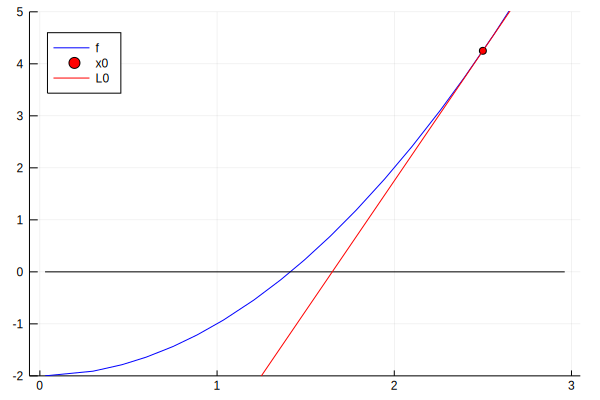

In [19]:
# Motivação geométrica
using Plots
gr(size=(600,400))
f(x) = x^2 - 2
plot(f, 0, 3, c=:blue, lab="f", leg=:topleft)
plot!(x->0, 0, 3, c=:black, lab="")
a = 2.5
scatter!([a], [f(a)], c=:red, lab="x0")
L(x) = f(a) + 2 * a * (x - a)
plot!(L, 0, 3, c=:red, lab="L0")
ylims!(-2, 5)

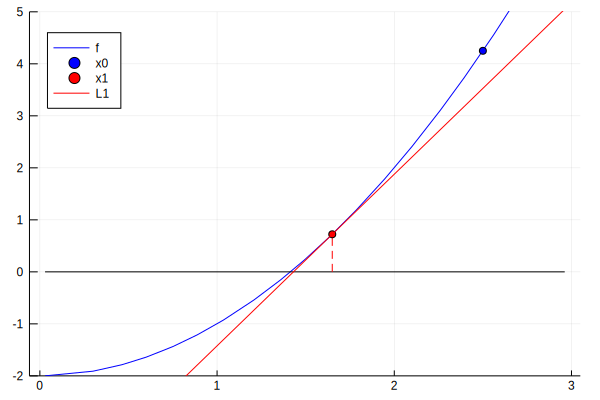

In [20]:
# Motivação geométrica
f(x) = x^2 - 2
plot(f, 0, 3, c=:blue, lab="f", leg=:topleft)
plot!(x->0, 0, 3, c=:black, lab="")
a = 2.5
scatter!([a], [f(a)], c=:blue, lab="x0")
a = a - f(a) / 2a
plot!([a; a], [0; f(a)], l=:dash, c=:red, lab="")
scatter!([a], [f(a)], c=:red, lab="x1")
L(x) = f(a) + 2 * a * (x - a)
plot!(L, 0, 3, c=:red, lab="L1")
ylims!(-2, 5)

#### A motivação é bastante simples: achar o zero de uma função afim é muito mais simples que de uma função não afim.
Então, vamos aproximar a função $f$ por uma função afim na iteração $k$ em torno do ponto $x_{k-1}$, e chamar seu zero de $x_k$. Repetimos o processo até que o critério de convergência seja satisfeito.

Teoricamente, estamos considerando a seguinte aproximação de Taylor:
$$ f(x_{k-1} + d) = f(x_{k-1}) + df'(x_{k-1}) + \frac{d^2}{2}f''(\xi), $$
onde $d$ é o **passo** que estamos tomando, e $\xi$ é um valor entre $x_{k-1}$ e $x_{k-1}+d$.
A aproximação de primeira ordem de $f$ é
$$ L(d) = f(x_{k-1}) + df'(x_{k-1}), $$
e a se $d$ ou $f''(\xi)$ forem muito próximos de zero, então o valor $f(x_{k-1}+d) \approx L(d)$.
Como queremos $f(x_{k-1}+d_k) = 0$, definimos $d_k$ a partir da solução de $L(d_k) = 0$.
Em outras palavras,
$$ f(x_{k-1}) + d_kf'(x_{k-1}) = 0. $$
Desse modo, se $f'(x_{k-1} \neq 0$, temos
$$d_k = -\dfrac{f(x_{k-1})}{f'(x_{k-1})}.$$

Isso nos permite definir a sequência gerada pelo método de Newton por
$$ x_k = x_{k-1} + d_k = x_{k-1} - \frac{f(x_{k-1})}{f'(x_{k-1})}. $$

Em particular, muitas vezes é mais claro escrever para $k+1$:
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}. $$

Note que essa sequência só está bem definida se $f'(x_k) \neq 0$ para todo $k$.
Além disso, não é trivial ver se essa sequência converge, diferente do que acontece com o método da bissecção.
Por sorte, temos um teorema declarando esse resultado.

**Teorema (da convergência do método de Newton):** Se $f$ é continuamente diferenciável no intervalo $[a,b]$ e
existe $c \in (a,b)$ tal que $f(c) = 0$ e $f'(c) \neq 0$, então existe $\delta > 0$ tal que se $x_0 \in [c-\delta,c+\delta]$, então
o método de Newton começando por $x_0$ gera uma sequência bem definida e convergente para $c$.
Se, além disso, $f''$ for contínua numa vizinhança de $c$, então a sequência converge quadraticamente.

*Dem.:* A demonstração foge do escopo da disciplina. Existem vários livros que podem ser consultados para verificar esta demonstração. Em particular, Ruggiero e Lopes ou Burden e Faires contém essa demonstração.
$\blacksquare$.

É importante perceber a diferença fundamental entre este teorema e o teorema de convergência do método de bissecção. No teorema da bissecção, uma condição bastante simples de mudança de sinal precisa ser satisfeita.
Aqui, o teorema diz apenas que existe uma vizinhança da solução onde podemos começar nosso método.
Não é dito nada sobre o tamanho desse intervalo, e além disso, precisariamos saber do valor de $c$ para saber onde centrar esse intervalo.
Isso muda fortemente nosso uso do método. Já que não é possível saber se estamos satisfazendo as condições de convergência, teremos sempre a preocupação de que podemos falhar a qualquer momento.
Logo, é imperativo que coloquemos condições de parada de exaustão para a finitude do método.

A parte sobre convergência quadrática será explicada abaixo.

As condições mais importantes aqui são:
- Condição de sucesso ($\left|f(x_k)\right| \leq \epsilon_a + \epsilon_r\left|f(x_0)\right|$.);
- Exaustão de algum tipo (avaliações de função, iterações, tempo);
- Derivada nula (ou muito próxima de zero).

In [21]:
"""`newton(f, fder, x; atol=1e-6, rtol=1e-6, maxiter=10_000, fdertol=1e-12)`

Calcula um zero para a função `f` utilizando o método de Newton.
Inicia o método a partir do ponto `x` e usa a função `fder ` como
derivada da função `f`.

Caso a derivada fique muito próxima de zero, um erro é lançado.

Saída: `xₖ, f(xₖ), k`

    xₖ    - aproximação para um zero de f
    f(xₖ) - f aplicada nessa aproximação
    k     - número de iterações
"""
function newton(f, fder, x; atol=1e-6, rtol=1e-6, maxiter=10_000, fdertol=1e-12)
    fx = f(x)
    iter = 0
    ϵ = atol + rtol * abs(fx)
    while !(abs(fx) <= ϵ || iter > maxiter)
        fderx = fder(x)
        if abs(fderx) < fdertol
            error("Derivada muito próxima de zero")
        end
        x = x - fx/fderx
        fx = f(x)
        iter += 1
    end
    return x, fx, iter
end

newton

In [22]:
f(x) = x^2 - 2
fder(x) = 2x
x0 = 1
x, fx, iter = newton(f, fder, x0)

(1.4142135623746899, 4.510614104447086e-12, 4)

In [23]:
x, fx, iter = newton(f, fder, 100.0)

(1.4162413320389438, 0.005739510575441642, 8)

In [24]:
x, fx, iter = newton(x->x * exp(x) - 1, x->exp(x) * (1 + x), -1.0)

LoadError: [91mDerivada muito próxima de zero[39m

In [25]:
x, fx, iter = newton(x->x * exp(x) - 1, x->exp(x) * (1 + x), 1.0)

(0.5671432965302959, 1.6912338640651114e-8, 4)

In [26]:
x, fx, iter = newton(x->exp(x), x->exp(x), 1.0)

(-13.0, 2.2603294069810542e-6, 14)

O exemplo abaixo serve para mostrar que às vezes Newton não converge, nem explode, e sua derivada também não fica próxima de zero.

In [27]:
a = 1/sqrt(5)
println("1/√5 = $a")
x, fx, iter = newton(x->x^3 - x, x->3x^2 - 1, 1/sqrt(5))
println("x = $x, iter = $iter")

1/√5 = 0.4472135954999579
x = -0.4472135954999579, iter = 10001


Perceba que às vezes o método de Newton não funciona, mas quando funciona, tende a ser bem mais rápido que o método da bissecção. Isso se deve à parte do Teorema que diz que a **convergência do método é quadrática**.

**Def.:** Uma sequência $\{x_k\}$ convergente à $a$ é dita ter convergência linear, ou quadrática, se
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|} = C, $$
para algum $0 < C < 1$, ou
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|^2} > 0, $$
respectivamente.

**Def.:** Uma sequência $\{x_k\}$ convergente à $a$ é dita ter convergência superlinear se
$$ \lim_{k\to\infty} \frac{|x^{k+1} - a|}{|x^k - a|} = C_k, $$
e $C_k \to 0$.

In [28]:
f(x) = x^2 - 1.0
fder(x) = 2x
x = 10.0
k = 0
@printf("%2s  %11s  %11s\n", "k", "f(x)", "x_k - 1.0")
@printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
while abs(f(x)) > 1e-12
    x = x - f(x)/fder(x)
    k += 1
    @printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
end

 k         f(x)    x_k - 1.0
0   +9.9000e+01  +9.0000e+00
1   +2.4502e+01  +4.0500e+00
2   +5.8854e+00  +1.6240e+00
3   +1.2577e+00  +5.0255e-01
4   +1.7515e-01  +8.4043e-02
5   +6.5263e-03  +3.2579e-03
6   +1.0579e-05  +5.2896e-06
7   +2.7979e-11  +1.3990e-11
8   +0.0000e+00  +0.0000e+00


Veja um exemplo onde as condições do Teorema não são verificadas.

In [29]:
f(x) = (x - 1.0)^2
fder(x) = 2(x - 1.0)
x = 10.0
k = 0
@printf("%2s  %11s  %11s\n", "k", "f(x)", "x_k - 1.0")
@printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
while abs(f(x)) > 1e-12
    x = x - f(x)/fder(x)
    k += 1
    @printf("%-2d  %+10.4e  %+10.4e\n", k, f(x), x - 1.0)
end

 k         f(x)    x_k - 1.0
0   +8.1000e+01  +9.0000e+00
1   +2.0250e+01  +4.5000e+00
2   +5.0625e+00  +2.2500e+00
3   +1.2656e+00  +1.1250e+00
4   +3.1641e-01  +5.6250e-01
5   +7.9102e-02  +2.8125e-01
6   +1.9775e-02  +1.4063e-01
7   +4.9438e-03  +7.0313e-02
8   +1.2360e-03  +3.5156e-02
9   +3.0899e-04  +1.7578e-02
10  +7.7248e-05  +8.7891e-03
11  +1.9312e-05  +4.3945e-03
12  +4.8280e-06  +2.1973e-03
13  +1.2070e-06  +1.0986e-03
14  +3.0175e-07  +5.4932e-04
15  +7.5437e-08  +2.7466e-04
16  +1.8859e-08  +1.3733e-04
17  +4.7148e-09  +6.8665e-05
18  +1.1787e-09  +3.4332e-05
19  +2.9468e-10  +1.7166e-05
20  +7.3669e-11  +8.5831e-06
21  +1.8417e-11  +4.2915e-06
22  +4.6043e-12  +2.1458e-06
23  +1.1511e-12  +1.0729e-06
24  +2.8777e-13  +5.3644e-07


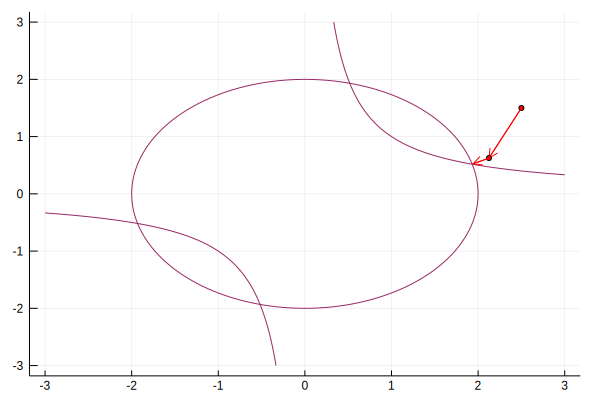

In [45]:
F(x,y) = [x^2 + y^2 - 4.0;
          x * y - 1.0]
J(x,y) = [2x  2y;
           y   x]
x,y = (2.5,1.5)

contour(linspace(-3, 3, 100), linspace(-3, 3, 100),
        (x,y) -> F(x,y)[1], levels=[0])
contour!(linspace(-3, 3, 100), linspace(-3, 3, 100),
        (x,y) -> F(x,y)[2], levels=[0])

scatter!([x], [y], c=:red, ms=3, leg=false)

d = -J(x, y) \ F(x, y) # -J⁻¹F

plot!(x + [0,d[1]], y + [0,d[2]], l=:arrow, c=:red)

x, y = x + d[1], y + d[2]

scatter!([x], [y], c=:red, ms=3, leg=false)

d = -J(x, y) \ F(x, y) # -J⁻¹F

plot!(x + [0,d[1]], y + [0,d[2]], l=:arrow, c=:red)

## Aproximações lineares diferentes de Newton

O Método de Newton tem uma grande falha. Se a derivada $f'(x_k) = 0$, então a iteração $k$ não está bem definida.
No entanto, podemos aproximar essa derivada de algumas maneiras simples.
Uma delas é utilizando dois pontos anteriores da curva:
$$ m = \frac{f(x_k) - f(x_{k-1})}{x_{k} - x_{k-1}}. $$

Essa aproximação forma, no lugar de uma reta tangente, uma reta **secante** à curva, de modo que chamamos o método que usa essa reta de **Método Secante**, ou da Secante.

Note que esse método precisa de um ponto inicial além do $x_0$.

In [30]:
#=
Entrada: f: função real
         x₀: ponto inicial
         x₁: outra aproximação diferente de x₀
0. k = 1
1. Enquanto |f(xₖ)| > ϵ
    1.1. m = (f(xₖ) - f(xₖ₋₁)) / (xₖ - xₖ₋₁)
    1.2. xₖ₊₁ = xₖ - f(xₖ)/m     # Obs: Essa conta pode ser aberta
    1.3. Incremente k
Saída:  xₖ: aproximação para o zero de f
        k:  número de iterações.
=#

In [81]:
function secante(f, a, b; atol = 1e-6, rtol = 1e-6, maxiter = 1000)
    # Exercício
    fa = f(a)
    if abs(fa) < 1e-6
        return a, fa, 0
    end
    fb = f(b)
    if abs(fb) < 1e-6
        return b, fb, 0
    end
    ϵ = atol + rtol * (abs(fa) + abs(fb)) / 2
    k = 1
    while !(abs(fb) < ϵ || abs(b - a) < 1e-12 || k > maxiter)
        m = (fb - fa) / (b - a)
        if abs(m) < 1e-12
            error("Nao deu")
        end
        a = b
        b = b - fb / m
        fa = fb
        fb = f(b)
        k += 1
    end
    return b, fb, k
end

secante (generic function with 1 method)

In [82]:
secante(x->x^2 - 1, 0, 1)

(1, 0, 0)

In [83]:
secante(x->x^2 - 2, 0, 1)

(1.4142135620573204, -8.931455575122982e-10, 7)

In [79]:
secante(x->exp(-x) - x, 0, 1)

(0.5671433066049633, -2.5380166635002865e-8, 5)

Outra modificação bastante simples, é o **Método de Newton Modificado**, que consiste de usar $m$ fixo igual ao primeiro ponto $f'(x_0)$. Na prática, após $N$ iterações, esse valor é atualizado, de modo que o método fica
como
$$ x_{k+1} = x_k - \frac{f(x_k)}{m_k}, $$
onde
$$ m_k = \left\{\begin{array}{ll}
f'(x_k), \mbox{se } k \mbox{ é divisível por } N, \\
m_{k-1}, \mbox{caso contrário}.
\end{array}\right. $$

# Exercícios

Faça os exercícios do capítulo 2, com exceção daqueles de assuntos não vistos em classe (e.g. Método do Ponto Fixo).

1. Utilize os métodos da Bissecção, de Newton e da Secante para encontrar uma
  aproximação para algum zero de cada uma das funções abaixo.  Para bissecção, use
  o intervalo $[a,b]$ dado, para Newton use $x_0 = a$, e para Secante, use $x_0 = a$ e
  $x_1 = b$.  Caso encontre alguma divisão por 0, raiz negativa, ou outro problema
  de domínio, declare falha. Declare convergência com $|f(x_k)| < 10^{-2}$.
  **Faça na mão**

  - $f(x) = x^2 - 2$, em $[1,2]$;
  - $f(x) = e^{-x} - x$, em $[0,1]$;
  - $f(x) = x^3 - 3x$, em $[1,2]$;
  - $f(x) = x^3 - 3x$, em $[-1,1]$;
  - $f(x) = \cos(x)$, em $[0,2]$;
  - $f(x) = \dfrac{x}{x^2 - 4}$, em $[-1,1]$;

2. Faça o que se pede
  - Mostre que o método da bissecção aplicado à função $f(x) = x - 2^{-n}$ leva
    $n$ iterações para convergir (teoricamente).
  - O exemplo em (a) mostra um defeito do método da bissecção: Ele pode demorar
    mesmo para funções fáceis. Para tentar remediar isso, o Método da Falsa Posição
    foi criado, onde a divisão do intervalo [a,b] é feita num ponto ponderado pelos
    valores dos inversos de $|f(a)|$ e $|f(b)|$. Desse modo, um ponto com valor de
    função mais próximo de zero tem peso maior.
    Em outras palavras, o próximo extremo do intervalo é
    dado por
    
    $$ x = \frac{ap_1 + bp_2}{p_1 + p_2} $$

    onde $p_1 = \dfrac{1}{|f(a)|}$ e $p_2 = \dfrac{1}{|f(b)|}$.
    Implemente este método.
  - Mostre que o x do Método da Falsa Posição pode ser escrito como

    $$ x = \frac{a f(b) - b f(a)}{f(b) - f(a)}. $$

  - Mostre que o Método da False Posição converge em uma iteração para qualquer
    função afim. Verifique isso para a função do item (a).

3. Considere o Método de Newton aplicado à função $f(x) = x^2 - 1$, a partir de
   algum $x_0 > 0$. Mostre que

  - Se $x_k \neq 1$, então $x_{k+1} > 1$.
  - Se $x_k > 1$, então $x_{k+1} < x_k$.
  - Se $x_0 > 0$, então $x_k \to 1$. (Dica: Use os três fatos anteriores para mostrar que converge, e calcule o limite).
  - Se $x_k > 1$, então $|x_{k+1} - 1| < |x_k - 1|^2/2$, logo $x_k$ converge quadraticamente.
  - Se $x_k > 1$, então $|f(x_{k+1})| < |f(x_k)|^2/4$, logo $f(x_k)$ converge quadraticamente.